# Vegetable Price Prediction Using Machine Learning
Implemented for Bhopal, Bhopal(F&V) market (Commodity = Cauliflower) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [2]:
vegetables = pd.read_csv('Bhopal_Cauliflower.csv')
vegetables.head()

Sl no. District Name  Market Name    Commodity Variety Grade  \
0       1        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
1       2        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
2       3        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
3       4        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
4       5        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      800                     1200   
1                      800                     1200   
2                      800                     1200   
3                      600                     1000   
4                      800                     1200   

   Modal Price (Rs./Quintal) Price Date  
0                       1000  31-Dec-19  
1                       1000  30-Dec-19  
2                       1000  29-Dec-19  
3                        800  28-Dec-19  
4                       1000  27-Dec-19

# Data Selection

select District Name == Bhopal <br>
Select Market Name == Bhopal(F&V) <br>
Then Select Variety == Jyoti

In [3]:
vegetables = vegetables[vegetables['District Name'] == "Bhopal"]
vegetables = vegetables[vegetables['Market Name'] == "Bhopal(F&V)"]
vegetables = vegetables[vegetables['Commodity'] == "Cauliflower"]
vegetables.head()

Sl no. District Name  Market Name    Commodity Variety Grade  \
0       1        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
1       2        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
2       3        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
3       4        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
4       5        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      800                     1200   
1                      800                     1200   
2                      800                     1200   
3                      600                     1000   
4                      800                     1200   

   Modal Price (Rs./Quintal) Price Date  
0                       1000  31-Dec-19  
1                       1000  30-Dec-19  
2                       1000  29-Dec-19  
3                        800  28-Dec-19  
4                       1000  27-Dec-19

In [4]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
#vegetables['Price Date'] = vegetables['Price Date'].dt.day
#vegetables = vegetables.iloc[::-1]
#vegetables.tail(10)
date = vegetables['Price Date']
date = np.reshape(np.array(date), (len(date),1))
df = pd.DataFrame(data = date, columns = ['Price_Date'])
df = df.iloc[::-1]
df.reset_index(inplace=True)
df.drop(['index'], axis=1,inplace=True)
df.head(5)
df.to_csv("Bhopal_Cauliflower_Date.csv")

# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [9]:
climate = pd.read_csv('Climate_Bhopal_Cauliflower.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name  Market Name    Commodity Variety Grade  \
0    279     280        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
1    278     279        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
2    277     278        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
3    276     277        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   
4    275     276        Bhopal  Bhopal(F&V)  Cauliflower   Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      400                      800   
1                      400                      600   
2                      400                      800   
3                      400                      800   
4                      400                      800   

   Modal Price (Rs./Quintal)  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  \
0                        600  ...  52.424706  49.164706  87.482353  63.244706   
1                        500  ...  52.212941  48.917647  87.65

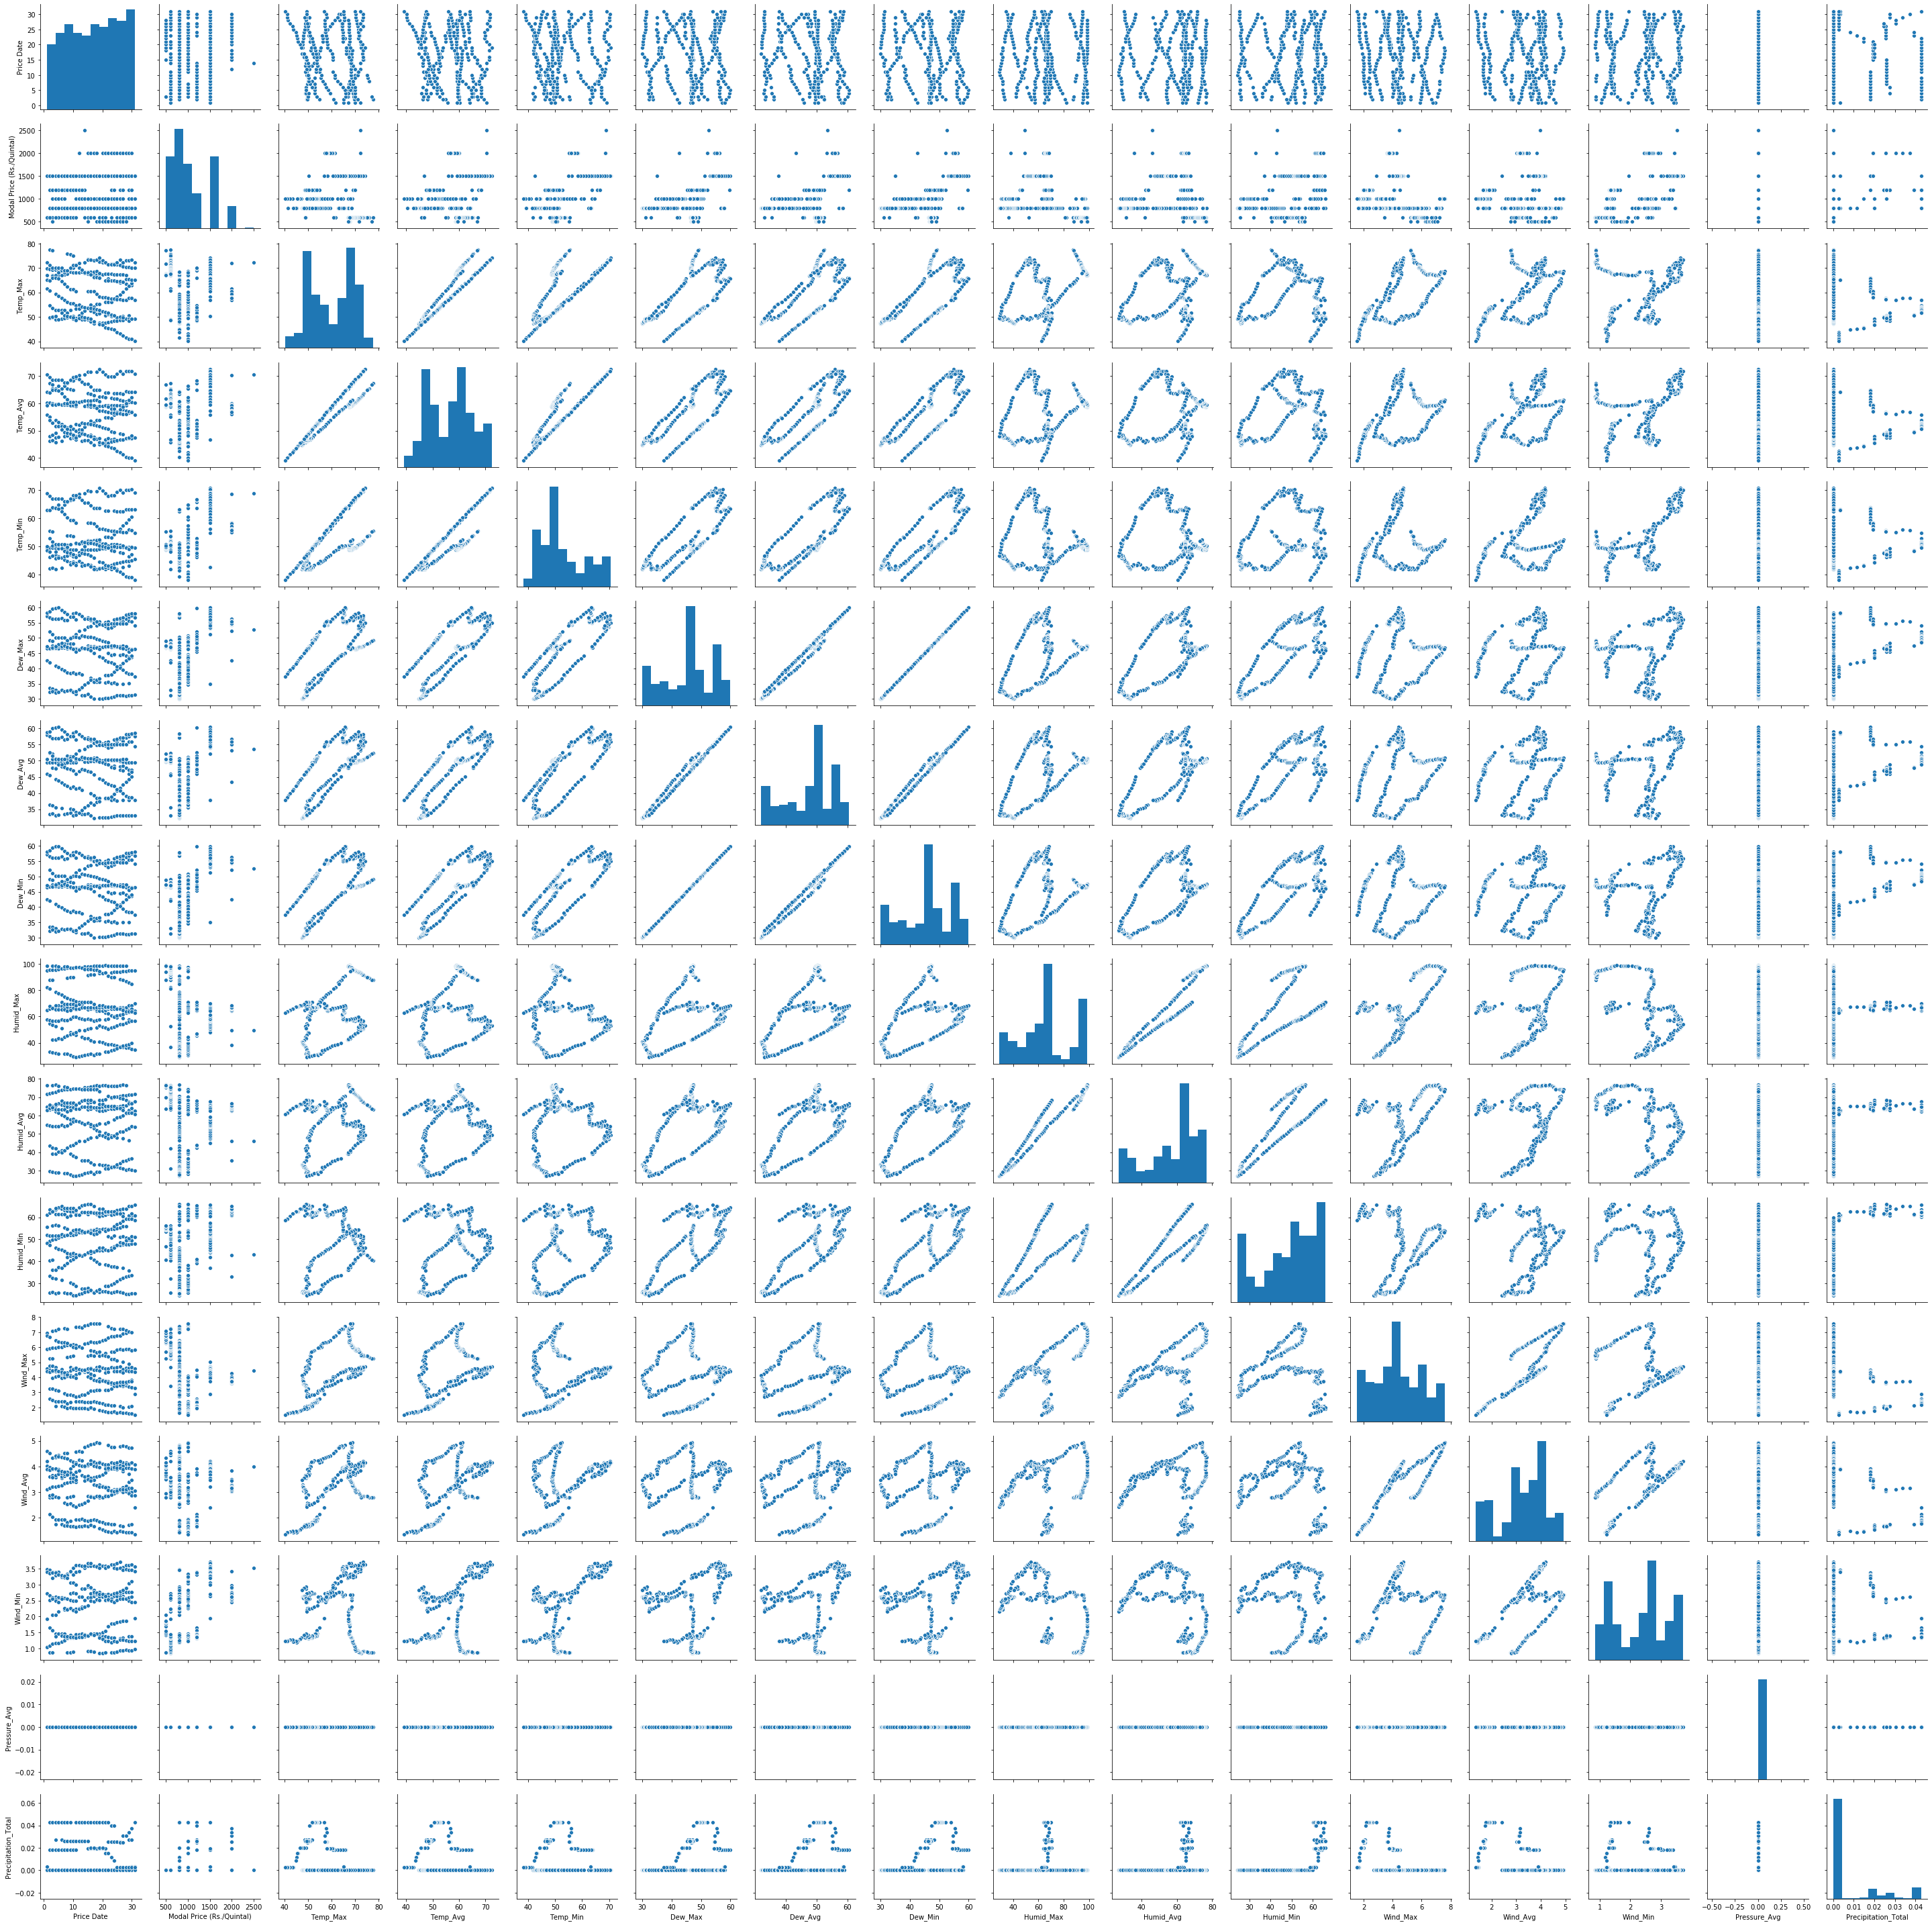

In [6]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [12]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 200,max_depth=300, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.3813118934631348


In [13]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [14]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.975088878413286
0.8365896857412809


# Feature Importance

In [15]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.040232564998718016
Temp_Max -> 0.029950202774711547
Temp_Avg -> 0.021468494985662216
Temp_Min -> 0.050605814201476695
Dew_Max -> 0.2555444550225228
Dew_Avg -> 0.06321105848317791
Dew_Min -> 0.25998563870205205
Humid_Max -> 0.04907140788823705
Humid_Avg -> 0.01244568521061258
Humid_Min -> 0.01477867724308799
Wind_Max -> 0.08313627188723381
Wind_Avg -> 0.027979208862604757
Wind_Min -> 0.0712588639711787
Pressure_Avg -> 0.0
Precipitation_Total -> 0.020331655768723964


# predicted vs Actual

In [16]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

612.5->600
818.0->800
1066.0->1500
1359.0->1000
1129.0->1200
1091.0->1000
801.0->800
1495.5->1500
1107.0->1200
995.0->1000
809.0->800
1647.5->1500
1177.0->1200
806.0->800
1391.5->800
756.0->800
1409.0->1500
966.0->1000
1479.0->1200
974.0->1000
503.5->500
797.0->800
1489.5->1500
1088.0->1200
996.0->800
1965.0->2000
805.0->800
506.0->500
593.5->600
787.0->800
599.0->600
1507.5->1500
600.0->600
1412.5->1500
1969.0->2000
799.0->800
1097.5->1200
1140.0->1000
601.5->600
844.0->800
519.0->600
1521.0->1500
840.0->800
598.5->600
804.0->800
1500.0->1500
604.5->600
808.0->800
1500.0->1500
864.5->800
794.0->1500
1586.5->1500
1031.5->1200
594.0->600
1500.0->1500
579.0->600
1047.0->1200
804.0->800
545.0->600
805.0->800
959.0->800
1997.5->2000
501.0->500
1236.5->1000
599.0->600
1458.0->1500
967.5->1000
840.0->800
994.0->1000
1782.5->2500
766.0->800
1019.0->1000
1017.5->1000
797.0->800
604.5->600
1475.5->1500
1677.5->2000
723.0->800
794.0->800
708.0->800
1500.0->1500
970.0->1000
1058.0->1200
1895.0->1

In [17]:
print(sum_a/l)

83.10714285714286


# Create picke file

In [19]:
import pickle
filename = 'Bhopal_Cauliflower'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [20]:
filename = 'Bhopal_Cauliflower'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [21]:
print(sum/len(actual)) 

46.975
